In [ ]:
from tensorflow.keras import backend as K   
import tensorflow as tf
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

K.clear_session()

# Note that we are including the densely-connected classifier on top;
# all previous times, we were discarding it.
model = VGG16(weights='imagenet')
from tensorflow.keras.applications.vgg16 import VGG16

K.clear_session()

# Note that we are including the densely-connected classifier on top;
# all previous times, we were discarding it.
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 4s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

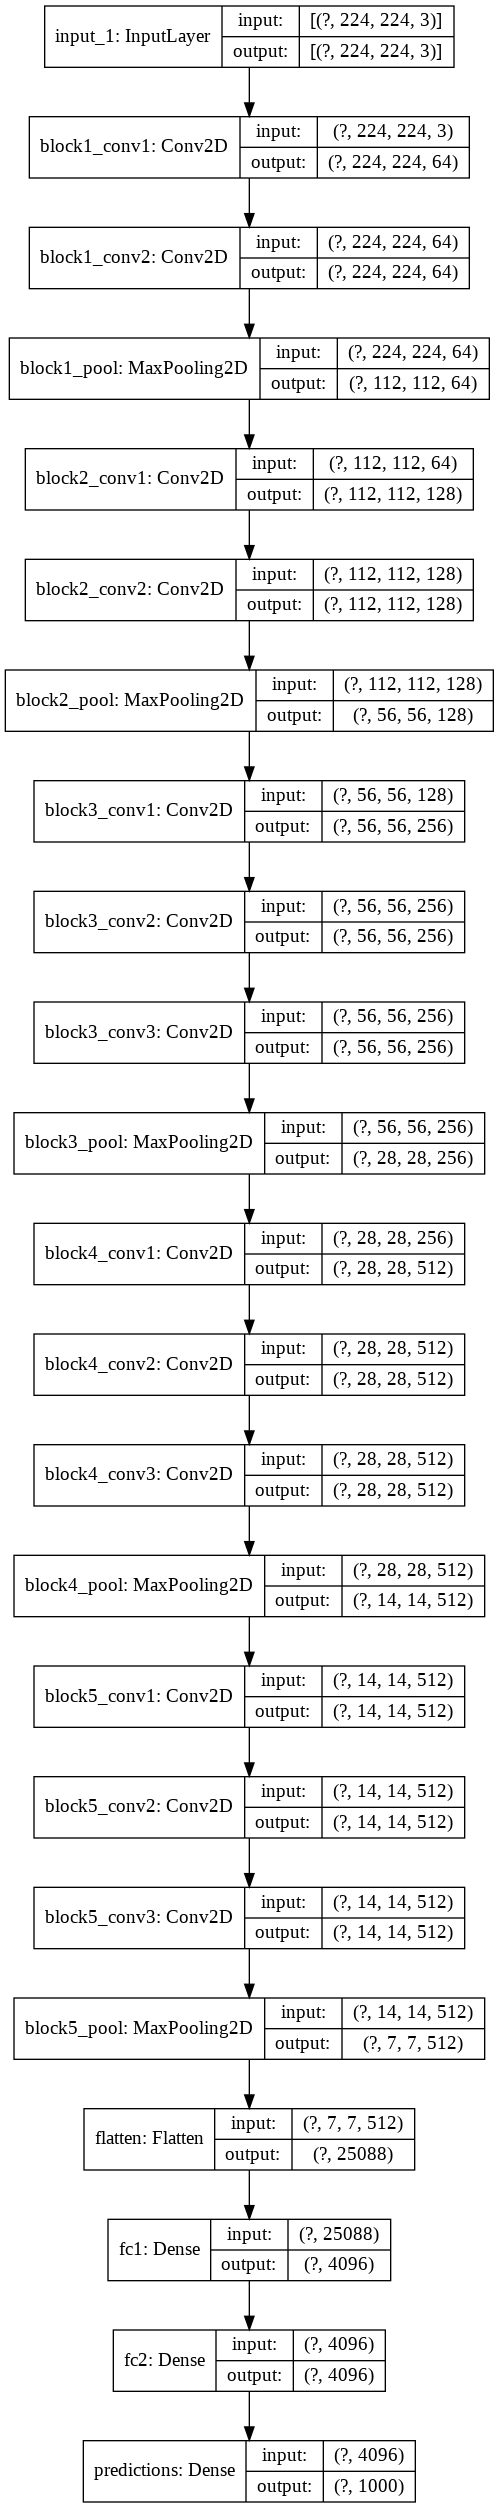

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
inlayer1=model.get_layer('block5_conv1')

In [ ]:
inlayer2=model.get_layer('predictions')
inlayer2.output

<tf.Tensor 'predictions/Softmax:0' shape=(None, 1000) dtype=float32>

In [ ]:
inlayer1.output

<tf.Tensor 'block5_conv1/Relu:0' shape=(None, 14, 14, 512) dtype=float32>

In [ ]:
model.output

<tf.Tensor 'predictions/Softmax:0' shape=(None, 1000) dtype=float32>

In [ ]:
model.outputs


[<tf.Tensor 'predictions/Softmax:0' shape=(None, 1000) dtype=float32>]

In [ ]:
new_model=Model(inputs=[model.inputs],outputs=[inlayer1.output,model.output])

In [ ]:
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

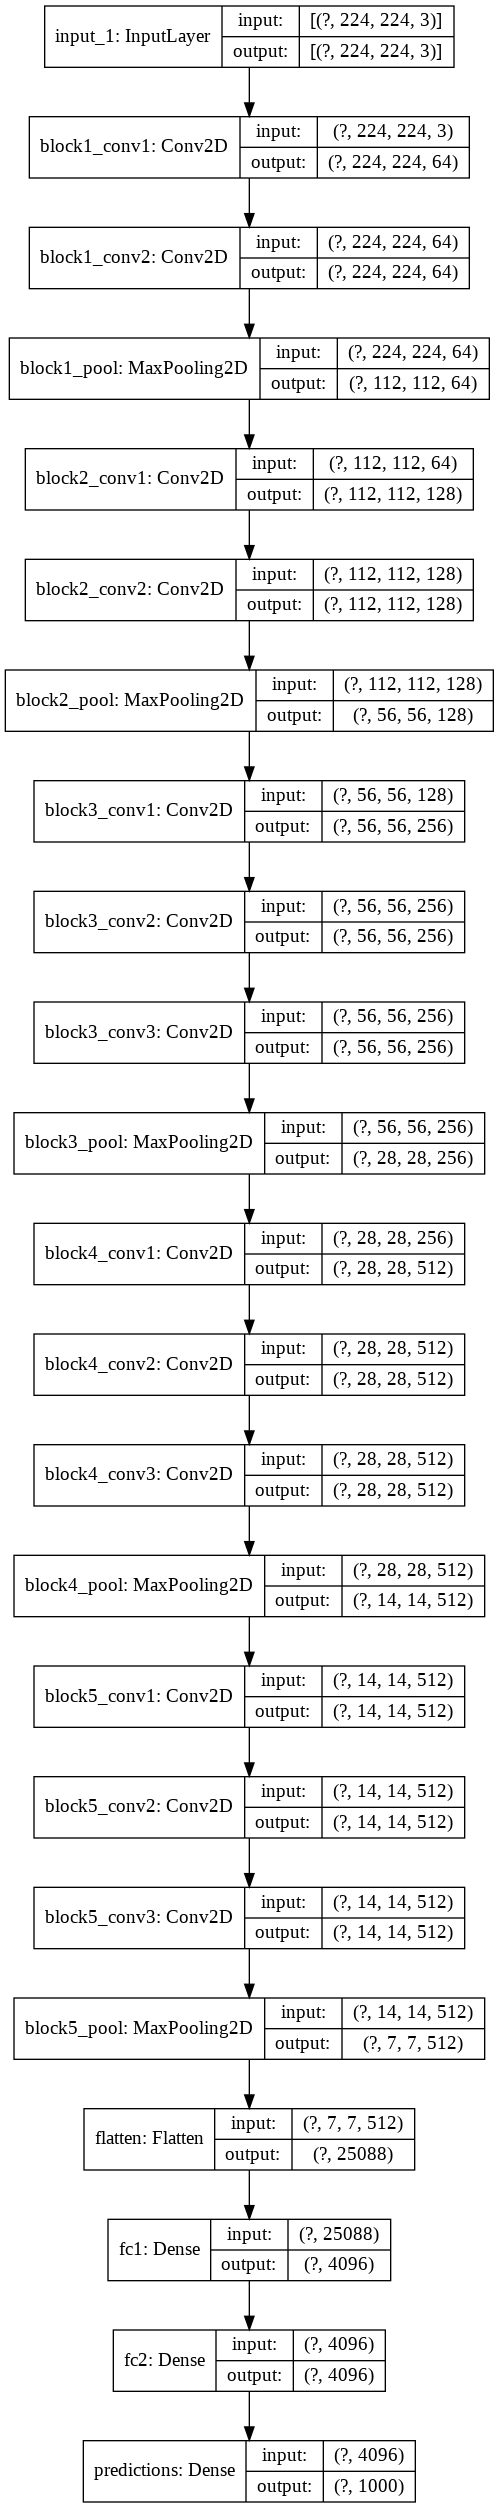

In [ ]:
tf.keras.utils.plot_model(new_model, show_shapes=True)

In [ ]:
!wget -O "21.jpg" 'https://media2.s-nbcnews.com/j/newscms/2015_48/1316806/151125-kid-with-dog-yh-1230p_a1d5c6f352b67e37690c51559fbcc4cc.fit-2000w.jpg'

--2020-10-19 06:57:10--  https://media2.s-nbcnews.com/j/newscms/2015_48/1316806/151125-kid-with-dog-yh-1230p_a1d5c6f352b67e37690c51559fbcc4cc.fit-2000w.jpg
Resolving media2.s-nbcnews.com (media2.s-nbcnews.com)... 23.64.214.35, 2600:1409:d000:5a0::a1d, 2600:1409:d000:59c::a1d
Connecting to media2.s-nbcnews.com (media2.s-nbcnews.com)|23.64.214.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400722 (391K) [image/jpeg]
Saving to: ‘21.jpg’

21.jpg              100%[===================>] 391.33K  --.-KB/s    in 0.03s   

2020-10-19 06:57:10 (11.5 MB/s) - ‘21.jpg’ saved [400722/400722]



In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# The local path to our target image
img_path = '/content/21.jpg'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [ ]:
preprocess_input?

In [ ]:
np.max(x)

151.061

In [ ]:
a=new_model.predict(x)

In [ ]:
a[0].shape

(1, 14, 14, 512)

In [ ]:
y=a[1]

In [ ]:
y?

In [ ]:
len(a)

2

In [ ]:
np.argmax(a[1])

211

In [ ]:
decode_predictions(y,top=5)[0]

[('n02100583', 'vizsla', 0.11602046),
 ('n02100877', 'Irish_setter', 0.076922186),
 ('n02090379', 'redbone', 0.05553681),
 ('n02102318', 'cocker_spaniel', 0.046167735),
 ('n02088466', 'bloodhound', 0.03559189)]

In [ ]:
import tensorflow as tf

x = tf.constant(5.0)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x**3

print(tape.gradient(y, x).numpy()) # -> 75.0

74.99999


In [ ]:
y

<tf.Tensor: shape=(), dtype=float32, numpy=125.0>

In [ ]:

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x)

In [ ]:
predictions?

In [ ]:
loss.shape

TensorShape([1])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
with tf.GradientTape() as gtape:
    conv_output, predictions = new_model(x)
    #predictions=predictions.numpy()
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

In [ ]:
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)

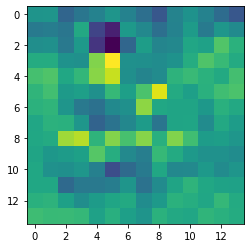

In [ ]:
plt.imshow(heatmap[0])

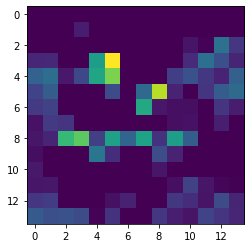

In [ ]:
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat
heatmap = heatmap[0]
plt.imshow(heatmap)

In [ ]:
import cv2

In [ ]:
new_img1=cv2.imread('/content/21.jpg')

In [ ]:
new_img1.shape

(1328, 2000, 3)

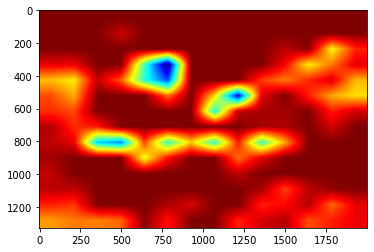

In [ ]:
new_im=cv2.resize(heatmap,(2000,1328))
plt.imshow(new_im)

In [ ]:

heatmap = np.uint8(255 * new_im)

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

In [ ]:
heatmap.shape

(406, 750, 3)

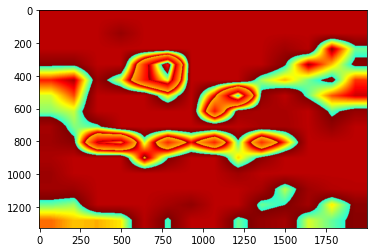

In [ ]:
plt.imshow(heatmap)

In [ ]:
superimposed_img = cv2.addWeighted(heatmap,0.6,new_img1,1.0,0)

In [ ]:
heatmap.shape,new_im.shape

((1328, 2000, 3), (1328, 2000, 3))

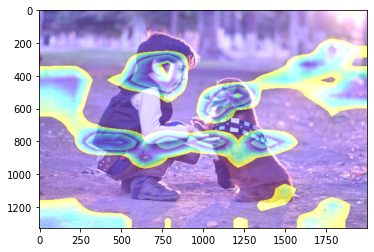

In [ ]:
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))

In [ ]:
'''https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb
https://arxiv.org/abs/1610.02391'''